# __CMSE  201 - Spring 2018__

<img src="https://cmse.msu.edu/_cmse/assets/Image/CMSE-bigger.png"
     alt="CMSE Grapical Image"
     style="float: right; margin-right: 10px; 
     height="82" 
     width="82"" />

# Python Bootcamp: Practice with Indexing and 2D Arrays


<img src="https://nerdist.com/wp-content/uploads/2016/06/Indiana-Jones-Raiders-Babay.jpg" alt= "Indiana Jones Looking at Golden Idol" width=400px>
___

# Introduction

In this notebook, we will be reviewing some concepts related with indexing 2D numpy arrays and reviewing the Von Neumann neighborhood by means of example.

## What is in this notebook?

* Part 1: General array manipluation including slicing and other concepts related to indexing
* Part 2: Review of Von Neumann Neighborhood and a slight modification
* Part 3: Example of working with 2D arrays and using the Von Neumann Neighborhood

__**Feel free to skip around if there are things youre already comfortable with**__

---


In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Part 1: Indexing Arrays

In part 1, we will revisit some concepts related to indexing arrays and working with subsets of 2D arrays. Note that this was taken and modified from the Day-12 Pre-Class. Refer back to that notebook for more details. 


---

## Array creation and basic properties 

### Creating arrays
The line below creates an 8x10 array of zeros called ```my_array```.  Note that you can do this with any numpy array method (```ones```, ```zeros_like```, ```ones_like```, etc.).  See [this page](http://docs.scipy.org/doc/numpy/reference/routines.array-creation.html) for a full list of routines for array creation.  You can also specify the array data type (float, int, etc.) by using the `dtype` argument, i.e., `dtype='float'` or `dtype='int'`.  By default, Numpy creates arrays of floating-point numbers.

In [2]:
# example 
a = np.zeros([8,10],dtype='int')
print("new array:\n", a)

new array:
 [[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


### Shape and size of arrays
The array `.shape` property tells you how large the array is in each dimension, `.ndim` tells you the number of dimensions, and `.size` tells you the total number of elements in the array. You can access each of the dimensions dim by `.shape[dim]`. Note that for 2D arrays, the dimensions refer to the number of rows (0th dimension) and the number of columns (1st dimension). 

In [3]:
print("the shape of this array is:", a.shape)
print("there are:", a.ndim, "dimensions")
print("there are", a.size, "total elements")

for i in range(a.ndim):
    print("the size of dimension", i, "is", a.shape[i])

the shape of this array is: (8, 10)
there are: 2 dimensions
there are 80 total elements
the size of dimension 0 is 8
the size of dimension 1 is 10


In [4]:
# Create an 11 by 12 2D array with all ones as the elements and use the above commands to print the size of each
# dimension and the total number of elements in the array

In [5]:
# Given the 2D array below, report the same features of the array as stated above.

A = np.array([
       [ 2.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.],
       [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  1.],
       [ 1.,  1.,  1.,  1.,  6.,  1.,  1.,  1.,  1.,  1.]])

---
## Slicing arrays 

Slicing arrays allows you to select some subset of the elements in a list or an array to manipulate or copy.  With slicing, there are three values that can be used along each dimension: `start`, `end`, and `step`, separated by colons.  

### Here are some examples in 1D:

```
myarray[start,end]   # items start through end-1
myarray[start:]      # items start through the end of the array
myarray[:end]        # items from the beginning of the array through end-1
myarray[:]           # a copy of the whole array
myarray[start,end,step]  # every "step" item from start to end-1
myarray[::step]      # every "step" item over the whole array, starting with the first element.
```

Note that negative indices count from the end of the array, so `myarray[-1]` is the last element in the array, `myarray[-2]` is the second-to-last element, etc.  You can also reverse the order of the array by starting at the end and counting to the beginning by negative numbers; in other words, `myarray[-1::-1]` starts at the end of the array and goes to the first element by counting down by one each time.

In [6]:
# create a 1D array with values 0...10
c = np.arange(0,10)
c

# Put your code below; if the above explanation is not enough to help you do the following, feel free to Google it 

#1. print the whole array

#2. print out some elements from the middle of the array

#3. print the second element through the second-to-last element

#4. print the first half of the array 

#5. print the second half of the array

#6. print every other element from 2-8 (inclusive)

#7. print every third element in the array

#8. reverse the array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 2D Cases
The same sort of technique can be used with a multidimensional array, with `start`, `stop`, and (optionally) `step` specified along each dimension, with the dimensions separated by a comma. The syntax would be:
`my2Darray[start1:stop1:step1, start2:stop2:step2]`
with the same rules as above. You can also combine slicing with fixed indices to get some or all elements from a single row or column of your array.
For example, array `b` created above is a $3\times 3$ array with the values 1–9 stored in it. We can do several different things:
```
b[0,:]     # get the first row
b[:,2]     # get the third column
b[1,::2]   # get every other element of the first row, starting at element 0
b[:2,:2]   # get a square array containing the first two elements along each dimension
b[-2:,-2:] # get a square array containing the last two elements along each dimension
b[::2,::2] # get a square array of every other element along each dimension
b[-1::-1,-1::-1]  # original-size array, but reversed along both dimensions
```

In [7]:
# create a 2D array with values 0...10
b = np.array([[1,2,3],[4,5,6],[7,8,9]])
b

# Put your code below; if the above explaination is not enough to help you do the following, feel free to ask!

# print the first row

# print the third column

# print every other element of the second row, starting with element 0

# print square array of first two elements along each dimension

# print reversed array

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

# Part 2: Von Neumann Neighborhood

A common tool that is used in agent-based models is the concept of a "neighborhood". We've worked with two in the past, namely, the Von Neumann and Moore neighborhoods. We will be revisiting the Von Neumann neighborhood in this notebook.

## Modified Von Neumann Code

In the below function, we have implemented the Von Neumann neighborhood with some minor changes. These changes appear in the form of a boolean logical variable called `found`. Notice that there is an incomplete doc-string (the portion in red quotes) immediately after the function definition. For this part of the notebook, complete the comments in the doc-string by writing a few lines describing the objective of this function, the inputs and outputs. 

In [8]:
def modified_von_neumann(position, world, agent_state, found = False):
    
    '''
        Objective: The purpose of this funciton it to look around a current location
                   and determine if an exit has been found
                   
        Inputs: position in world, world, status of desired agent, found boolean (false)
        
        Outputs: Location of desired agent, found boolean (true)
    '''
    
    # Current Position
    i = position[0]
    j = position[1]

    # Set a dummy value for the agent location
    agent_location = [-1,-1]
    
    # 
    if i > 0 and found == False: 
        if world[i-1,j] == agent_state:
            agent_location = [i-1,j]
            found = True
            
    if i < world.shape[1] - 1 and found == False:
        if world[i+1,j] == agent_state:
            agent_location = [i+1,j]
            found = True

    if j > 0 and found == False:
        if world[i,j-1] == agent_state:
            agent_location = [i,j-1]
            found = True
            
    if j < world.shape[0] - 1 and found == False:
        if world[i,j+1] == agent_state:
            agent_location = [i,j+1]
            found = True
                
    return agent_location, found

---

# Part 3: Quest for the Golden Idol

In part 3, we will work with 2D arrays by means of example. Refer to the content above if you need to review some concepts.

## Introduction to the Problem

Indiana Jones (aka Indy) is a well-known treasure hunter. In his most recent quest, he stumbles across a labyrinth in which he knows there is a golden idol at the end. In orfer to get to the labyrinth, he needs to swim through shark **and** crocodile infested waters (don't ask how that is possible). Doing so has rendered any supplies to make a torch useless. Therefore, Indy is traveling through the labyrinth in complete darkness.

You goal is to write some functions that moves Indy through the labyrinth and checks to see if he has come across the priceless idol.

In the cell below, we initialize the "labryinth" that we will be using for this example. We also make use of a function that was used in a previous In-Class assignment (Day-12 In-Class) - the plotgrid function

In [9]:
## TO BE REMOVED

# # Initialize Board

# # Specify size of one side of NxN board
# N = 10

# # Initialize array of NxN
# labyrinth = np.zeros([N,N])

# # Output Result
# labyrinth

In [10]:
## TO BE REMOVED

# # Create Walls
# labyrinth[0:2,-4:] = 1
# labyrinth[1:5,:-5] = 1
# labyrinth[1:3,4] = 1
# labyrinth[3,4:8] = 1
# labyrinth[:,-1] = 1
# labyrinth[6:8,1::] = 1
# labyrinth[6:8,1::] = 1
# labyrinth[-1,:4] = 1
# labyrinth[-1,5::] = 1
# labyrinth[5,6::] = 1

# # Place idol
# labyrinth[-2,-2] = 3

# # Starting point
# labyrinth[0,0] = 2

# # Ending point
# labyrinth[-1,4] = 4

# labyrinth

In [11]:
# Initialize the labyrinth

labyrinth = np.array([
       [ 2.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.],
       [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  1.],
       [ 1.,  1.,  1.,  1.,  6.,  1.,  1.,  1.,  1.,  1.]])

In [12]:
# This is the function that was used for the forest fire ABM with some modifications.
def plotgrid(myarray):
    
    # 
    x_range = np.linspace(0, myarray.shape[0], myarray.shape[0]) 
    y_range = np.linspace(0, -myarray.shape[1], myarray.shape[1])
    
    # 
    x_indices, y_indices = np.meshgrid(x_range, y_range)
    
    
    # Specify open locations
    path_x = x_indices[myarray == 0];   
    path_y = y_indices[myarray == 0];
    
    # Specify path when searching for idol
    start_x = x_indices[myarray == 2];
    start_y = y_indices[myarray == 2];
    
    # Specify wall locations
    wall_x = x_indices[myarray == 1];   
    wall_y = y_indices[myarray == 1]; 
    
    # Specify idol location
    idol_x = x_indices[myarray == 3];
    idol_y = y_indices[myarray == 3];
    
    # Specify indicator for collecting idol
    taken_idol_x = x_indices[myarray == 4];
    taken_idol_y = y_indices[myarray == 4];
    
        
    # Specify Path whindicator when leaving
    get_out_x = x_indices[myarray == 5];
    get_out_y = y_indices[myarray == 5];
    
    # Specify ending location
    end_x = x_indices[myarray == 6];
    end_y = y_indices[myarray == 6];

    
    
    # 
    plt.plot(path_x,path_y, 'ws',markersize=10, label = "Open space = 0")  
    plt.plot(wall_x,wall_y, 'ks',markersize=10, label = "wall = 1") 
    plt.plot(start_x,start_y, 'bx',markersize=10, label = "Path of Indiana Jones = 2")  
    plt.plot(idol_x,idol_y, 'yd',markersize=10, label = 'Idol = 3')
    plt.plot(taken_idol_x,taken_idol_y, 'kd',markersize=10, label = 'Removed Idol = 4')
    plt.plot(get_out_x,get_out_y, 'yx',markersize=10, label = 'Return Path = 5')
    plt.plot(end_x,end_y, 'rs',markersize=10, label = 'Exit = 6')
    plt.legend(bbox_to_anchor=(1.1, 1.04))


    # 
    plt.tick_params(axis='both', which='both',
                    bottom='off', top='off', left='off', right='off',
                    labelbottom='off', labelleft='off')

### Viewing the labryinth
Now that we've initialized the labryinth and have a function that displays it, let's see what it looks like. Run the cell below to view the Labryinth.

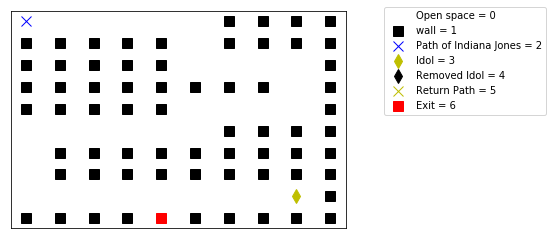

In [13]:
# Display labyrinth
plotgrid(labyrinth)

### Understanding the above plot

The different locations on the map are designated with various numerical values which can be seen in the legend to the right of the plot. These values will be used when we move Indy through the labyrinth. For example, we will want to use the von Neumann neighborhood to determine what the legal moves are for Indy (i.e. open spaces). We also will want to check to see if Indy has found the idol by searching for the value of 3.

In [14]:
# In this cell, we initialize some variables

# Starting point of Indiana Jones
indy_position = [0,0]

# Part 3a: Moving through the labyrinth

In order to start his search, Indy needs to move throgh the labyrinth. Since he cannot see, he needs to look around him in (using a Von Neumann Neighborhood) to figure our if he has found the idol or if he has run into a wall. In the case that Indy does not find the idol, he must continue through the labyrinth until he finds it.

**Goal**: The goals for this function are as follows:

* Before updating the position of Indy, check to see if the spot he will move has the idol. If it does, replace the idol symbol with the "taken idol symbol" and move Indy to that location and set the found_idol boolean to `True`.

* If the idol has been found, store its location which will be returned from the function.

* If the idol is not there, update the position of Indy based on the open spaces making sure to avoid the walls (look at the legend to see how each are defined).
 
* Once the idol has been found, Indy should stop moving.

The "up" direction of the neighborhhod check in the "look_for_idol" function has been provided. See if you can understand what each piece in that code is doing with respect to the above bullet points. Then using a similar approach, add the code needed to have it work for all directions around Indy in the remaining directions (i.e. down left, and right).

In [15]:

def look_for_idol(indy_position, labyrinth, idol_loc = [-1,-1], found_idol=False):
    
    """
        Objective: This function looks around Indy to determine if he has found the 
                   idol or needs to move further in the labyrinth
                   
        Inputs: current position, the board, idol_location, boolean for finding idol
        
        Outputs: New position, found_idol boolean, location of idol
    """

    # Specify current location of Indy
    i = indy_position[0]
    j = indy_position[1]
    
    # Check above Indy if not in 0th row
    if i > 0 and found_idol == False: 
        
        # First check to see if idol is in that spot
        if labyrinth[i-1, j] == 3:
            found_idol = True
            idol_loc = [i-1,j]
            indy_position = idol_loc

        # If idol is not found move Indy if spot is open
        elif labyrinth[i-1, j] == 0:
            indy_position = [i-1,j]
            labyrinth[i-1,j] = 2
    
    # Check beneath Indy if not in last row        
    if i < labyrinth.shape[0] - 1 and found_idol == False:
        
        # Check to see if idol is found
        if labyrinth[i+1, j] == 3:
            found_idol = True
            idol_loc = [i+1,j]
            indy_position = idol_loc
        
        # Move Indy if spot is open
        elif labyrinth[i+1, j] == 0:
            indy_position = [i+1, j]
            labyrinth[i+1,j] = 2
    
    # Check to the left of indy if not in first column
    if j > 0 and found_idol == False:
        
        # Check to see if Idol is found
        if labyrinth[i, j-1] == 3:
            found_idol = True
            idol_loc = [i,j-1]
            indy_position = idol_loc
        
        # Move Indy if spot is open
        elif labyrinth[i, j-1] == 0:
            indy_position = [i,j-1]
            labyrinth[i,j-1] = 2

    # Check to the right of Indy if not in last column
    if j < labyrinth.shape[1] - 1 and found_idol == False:
        
        # Check to see if idol is found
        if labyrinth[i, j+1] == 3:
            found_idol = True
            idol_loc = [i,j+1]
            indy_position = idol_loc
            
        # Move Indy if spot is open
        elif labyrinth[i, j+1] == 0:
            indy_position = [i,j+1]
            labyrinth[i,j+1] = 2


    return indy_position, found_idol, idol_loc

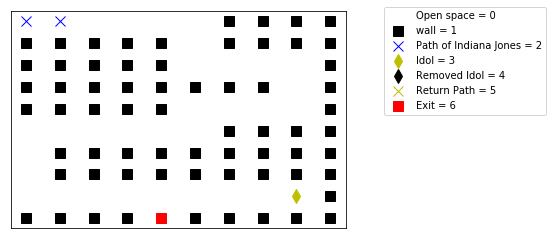

In [16]:
# Test your above code by starting Indy at [0,0] and then calling your above function
# You should then outubut your results to make sure it is doing what it should

# Place your initilaization and function call here
indy_position , found_idol, idol_loc = look_for_idol(indy_position, labyrinth)
plotgrid(labyrinth)


# Execute this cell multiple times to verify it works

# Part 3b: Repeating the process

Your goal here is to write a few lines of code that move Indy until the idol has been found. Once Indy has found the idol, remember to replace it with the correct marker (see legend).

Note that the above funciton returns a boolean logical that is `True` when the idol has been found which you can use to help you accomplish this task. Try using a while loop here. For the while loop, include a maximum number of iterations ($i$ = 100) to avoid an infinite loop.

In [17]:
## TO BE REMOVED
i = 0
# Iterate until idol is found
while found_idol == False:
    indy_position , found_idol, idol_loc = look_for_idol(indy_position, labyrinth)
    if found_idol == True:
        labyrinth[idol_loc[0],idol_loc[1]] = 4
        
    i = 100

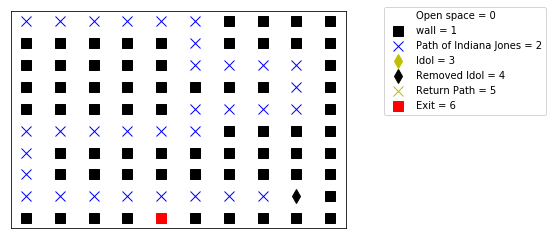

In [18]:
# In this cell, plot the labryinth to see that the path taken was correct.
plotgrid(labyrinth)

# Part 3c: Getting out

Indy has a good memory and remembers the way that he came in. However as he grabs the idol he hears a large boulder close off his initial entrance. Indy now needs to retrace his steps and see if he can find a way out. Luckily for him, by what he can hear, the boulder crashing down seems to have opened up an escape route nearby. Indy must now retrace his steps and search around him at each step for this escape route.

**Goal**: There are three things you need to do here:

* Update the position of Indy based on his previous route (check the legend to see how this is defined)
* After you Move Indy, update the value of Indy's position to be the value that corresponds to "Return Path" (see legend)
* After Indy has been moved and the value updated, check around him to see if the exit is around him (see legend)

For the third bullet point, you can use the function from part 2.

In [19]:
def get_out(indy_position):
    
    '''
        Objetivec: This function moves Indy from his current location back along his route
                   and checks to see if an escape route is found
                   
        Inputs: Current position of Indy
        
        Outputs: New Position of Indy
    '''
    
    # Get current position of Indy
    i = indy_position[0]
    j = indy_position[1]
    
    # Check to above Indy for back tracking
    if i > 0:   
        if labyrinth[i-1, j] == 2:
            indy_position = [i-1,j]
            labyrinth[i-1,j] = 5
            
    # Check to the under Indy
    if i < labyrinth.shape[1] - 1:
        if labyrinth[i+1, j] == 2:
            indy_position = [i+1, j]
            labyrinth[i+1,j] = 5   
            
    # Check to the left of Indy
    if j > 0:
        if labyrinth[i, j-1] == 2:
            indy_position = [i,j-1]
            labyrinth[i,j-1] = 5
            
    # Check to the right of Indy
    if j < labyrinth.shape[0] - 1:       
        if labyrinth[i, j+1] == 2:
            indy_position = [i,j+1]
            labyrinth[i,j+1] = 5   
            
    return indy_position

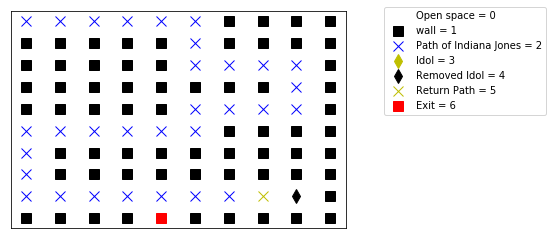

In [20]:
# Test your above code by calling your above function and verifying that the correct move is made. 
# When Indy moves, the position he is at should now be a golden 'x'.

# Execute this cell multiple times to verify it works

# Place your function call below
indy_position = get_out(indy_position)
exit_location, found = modified_von_neumann(indy_position, labyrinth, 6)
if found == True:
    labyrinth[exit_location[0],exit_location[1]] = 5

plotgrid(labyrinth)


# Part 3d: Repeating the process

Similar to part 3b, write a loop that repeats the above function call until Indy gets out. Remember to update the exit location to have the correct marker ("Return Path"). Include a maximum number of while loop iterations ($i$ = 100) to make sure that you avoid an infinite loop.


In [21]:
# TO BE REMOVED
found = False
i = 0
imax = 100
while found == False and i < imax:
    indy_position = get_out(indy_position)
    exit_location, found = modified_von_neumann(indy_position, labyrinth, 6)
    if found == True:
        indy_position = [exit_location[0], exit_location[1]]
        labyrinth[exit_location[0],exit_location[1]] = 5
    i += 1

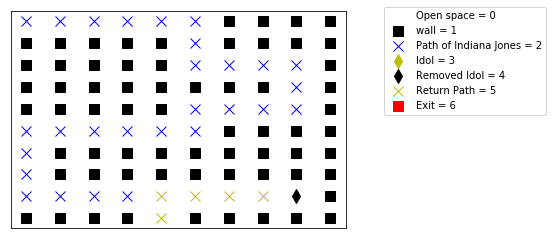

In [22]:
# Plot the labryinth again to see that the path Indy took to get out is also correct.
plotgrid(labyrinth)